In [3]:
from utils.file_utils import merge_csv, read_csv
from utils.calc_distance import add_nearest_mrt
from utils.geocode import geocode
from preprocessing.clean import clean_data
from preprocessing.encode import encode_data
from models.validate import prepare_split
from models.graph import plot_prediction, plot_residuals
from models.knn import get_knn, test_k_values, test_knn
from models.linear_regression import test_alpha_value,test_linear,test_lasso,test_ridge
from models.regression_tree import test_tree_depth, test_rt
from models.random_forest import test_rf
from models.comparison import run_model_comparison, plot_model_comparison,summarize_best_models
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import mplcursors

In [ ]:
# Prepare data set from pre-encoded dataset (baseline set)
data = read_csv('output/encoded_data.csv') 
train_X, test_X, train_y, test_y = prepare_split(data)

# Model Optimization



## Linear Regression


First, we tried multiple values of alpha to determine the most optimal value of alpha for ridge or lasso regularization for this data set.

In [5]:
import warnings
warnings.simplefilter('ignore')
test_alpha_value(train_X, train_y)

Best alpha for Lasso: 0.5
Best alpha for Ridge: 0.5


Using this optimal alpha value of 0.5, we tested baseline linear regression against regression with regularization, testing against the metrics of MAE and Cross Validation R2 scoring.

In [7]:
y_pred_linear = test_linear(train_X, test_X, train_y, test_y)

RMSE: 74034.57930
MAE: 58589.04465
R2: 0.80315
Cross-validation R2 scores: [0.80782956 0.80570993 0.808826   0.805846   0.80610999]
Mean CV R2: 0.80686


In [12]:
y_pred_ridge = test_ridge(train_X, test_X, train_y, test_y, alpha = 0.5)

Ridge RMSE: 74034.22982
Ridge MAE: 58589.47442
Ridge R2: 0.80315
Cross-validation R2 scores: [0.80781369 0.80570754 0.80882146 0.80583239 0.80610404]
Mean CV R2: 0.80686


In [15]:
y_pred_lasso = test_lasso(train_X, test_X, train_y, test_y, alpha = 0.5)

Lasso RMSE: 74036.04581
Lasso MAE: 58590.07212
Lasso R2: 0.80314
Cross-validation R2 scores: [0.80781428 0.80570696 0.80882224 0.80583355 0.80610581]
Mean CV R2: 0.80686


We concluded that the base linear regression is slightly more optimal/equal to regression with the regularization methods. This is supported by our initial EDA which showed that all features contributed equally to the prediction and overfitting is not necessarily an issue for this data. Therefore, we chose to utilize the simpler and more interpretable model of base linear regression.

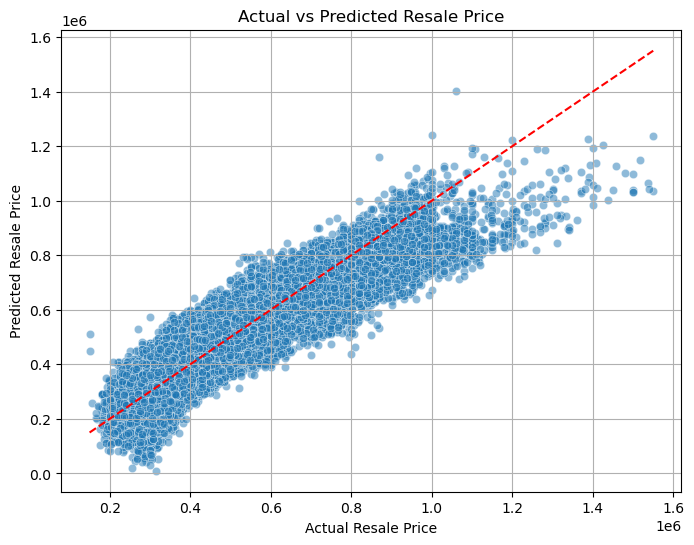

In [9]:
plot_prediction(test_y, y_pred_linear)

- Relatively tight clustering around the diagonal line
- Strong linear trend
- Big spike in variance for the higher-priced resale flats
    - Possibility of non-linear relationship between features and resale price for higher values, or outliers

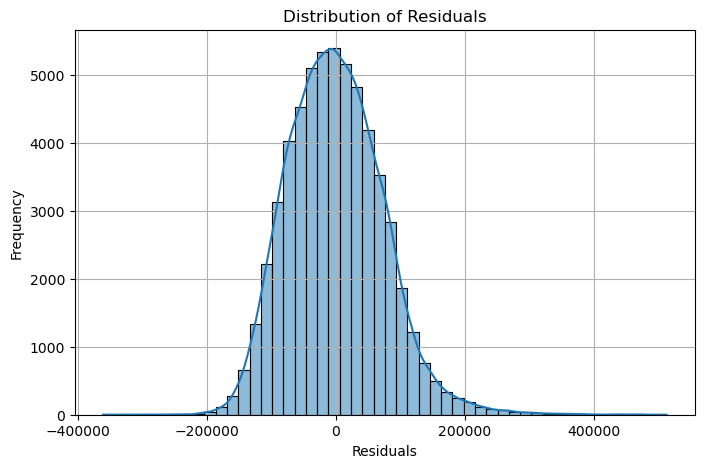

In [10]:
plot_residuals(test_y, y_pred_linear)

- Centered at zero -> No consistent bias
- Symmetrical and bell-shaped -> Normally distributed
- Lack of skew -> Extreme errors are rare

## K Nearest Neighbours

First, we attempt to find the most optimal k value for the nearest neighbour algorithim by plotting Cross Validation Mean R2 against k.

In [3]:
# Implementing k Nearest Neighbour Algorithm
k_lim = len(train_X)**0.5 #finding max k value for kNN
#print(k_lim)

k_values = [i for i in range(1,round(k_lim+1))]

rsq_values = []
general_k_values = []

for i in range(0,len(k_values), 20):
    knn_reg = get_knn(k_values[i])
    rsq_value = cross_val_score(knn_reg, train_X, train_y, cv = 5, scoring = "r2")
    rsq_values.append(np.mean(rsq_value))
    general_k_values.append(k_values[i])
    print(f'{k_values[i]} nearest neighbour: R^2 value: {np.mean(rsq_value)}')

1 nearest neighbour: R^2 value: 0.9073479954469199
21 nearest neighbour: R^2 value: 0.9263388599943262
41 nearest neighbour: R^2 value: 0.9132356462240839
61 nearest neighbour: R^2 value: 0.9035112978188403
81 nearest neighbour: R^2 value: 0.8960652692600162
101 nearest neighbour: R^2 value: 0.8898348637959597
121 nearest neighbour: R^2 value: 0.8843895392056949
141 nearest neighbour: R^2 value: 0.8795873078224785
161 nearest neighbour: R^2 value: 0.8752700667543536
181 nearest neighbour: R^2 value: 0.8713375940061301
201 nearest neighbour: R^2 value: 0.8677484452839475
221 nearest neighbour: R^2 value: 0.8643901380522576
241 nearest neighbour: R^2 value: 0.8612715607796659
261 nearest neighbour: R^2 value: 0.8583591279480791
281 nearest neighbour: R^2 value: 0.8556448330674401
301 nearest neighbour: R^2 value: 0.853088270186736
321 nearest neighbour: R^2 value: 0.8506780910702924
341 nearest neighbour: R^2 value: 0.8484090712903157
361 nearest neighbour: R^2 value: 0.8462457785210941


In [4]:
zoomed_rsq_values = []
zoomed_k_values = list(range(1, 42))

for i in zoomed_k_values:
    knn_reg = get_knn(i)
    rsq_value = cross_val_score(knn_reg, train_X, train_y, cv = 5, scoring = "r2")
    zoomed_rsq_values.append(np.mean(rsq_value))
    print(f'{i} nearest neighbour: R^2 value: {np.mean(rsq_value)}')

1 nearest neighbour: R^2 value: 0.9073479954469199
2 nearest neighbour: R^2 value: 0.9289484825055496
3 nearest neighbour: R^2 value: 0.9348389134908086
4 nearest neighbour: R^2 value: 0.9369036779829285
5 nearest neighbour: R^2 value: 0.9375720100690856
6 nearest neighbour: R^2 value: 0.9376671175902072
7 nearest neighbour: R^2 value: 0.93735301186812
8 nearest neighbour: R^2 value: 0.9367726286824984
9 nearest neighbour: R^2 value: 0.9361023481444125
10 nearest neighbour: R^2 value: 0.935442225541005
11 nearest neighbour: R^2 value: 0.934618331618897
12 nearest neighbour: R^2 value: 0.9337119770061937
13 nearest neighbour: R^2 value: 0.9328487083696902
14 nearest neighbour: R^2 value: 0.9319626589980373
15 nearest neighbour: R^2 value: 0.9311617773245965
16 nearest neighbour: R^2 value: 0.930378243548328
17 nearest neighbour: R^2 value: 0.9295409262743523
18 nearest neighbour: R^2 value: 0.9288182712849935
19 nearest neighbour: R^2 value: 0.9280096726361391
20 nearest neighbour: R^2 

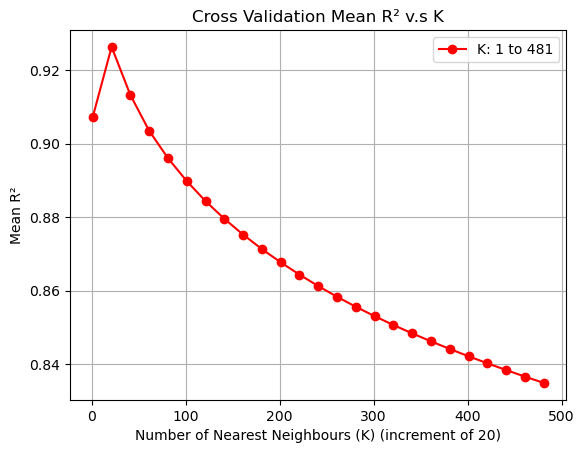

In [7]:
# Finding best k value
general_k_values = []
for i in range(0,len(k_values), 20):
    general_k_values.append(k_values[i])


# plotting R^2 values against k_values
plt.plot(general_k_values, rsq_values, color = "red", marker = "o", label = "K: 1 to 481")
plt.title("Cross Validation Mean R² v.s K")
plt.grid(True)
plt.xlabel("Number of Nearest Neighbours (K) (increment of 20)")
plt.ylabel("Mean R²")
plt.legend()
plt.show()

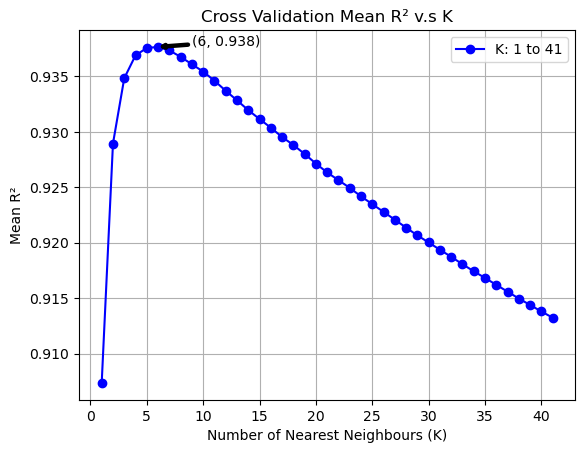

In [11]:
best_rsq_index = np.argmax(zoomed_rsq_values)
best_rsq = zoomed_rsq_values[best_rsq_index]
best_k = k_values[best_rsq_index]
zoomed_k_values = list(range(1,42))
# zoom into maximum region
plt.plot(zoomed_k_values, zoomed_rsq_values, color = "blue", marker = "o", label = "K: 1 to 41")
#plt.text(k_values[2], zoomed_rsq_values[2], f'({k_values[2]}, {round(zoomed_rsq_values[2],3)})', fontsize=12, ha='left', va='bottom')
plt.annotate(f'({best_k}, {round(best_rsq,3)})',
             xy=(best_k, best_rsq), 
             xytext=(best_k+3, best_rsq+0.0001),  # where the label appears
             arrowprops=dict(arrowstyle='->', facecolor='black', shrinkA = 0.8, shrinkB=0.005, lw = 3.2, mutation_scale = 5),
             fontsize=10)
plt.grid(True)
mplcursors.cursor(hover=True)
plt.title("Cross Validation Mean R² v.s K")
plt.xlabel("Number of Nearest Neighbours (K)")
plt.ylabel("Mean R²")
plt.legend()
plt.show()

Based on the earlier analysis, using 5-fold cross validation, R^2 value of the kNN models is maximised with k = 6 nearest neighbours with a mean R^2 value of 0.938

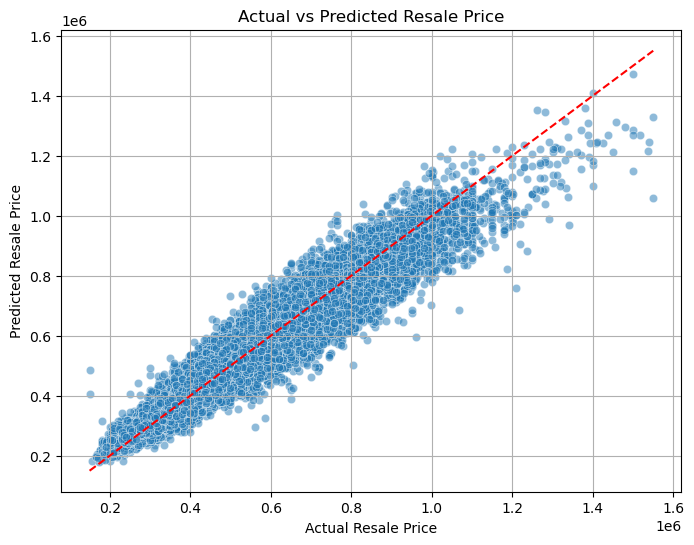

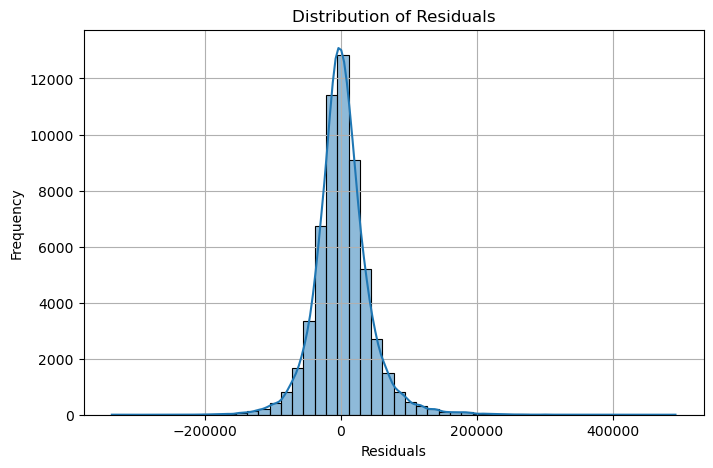

In [11]:
y_pred_knn = test_knn(train_X, test_X, train_y, n=6)
plot_prediction(test_y, y_pred_knn)
plot_residuals(test_y, y_pred_knn)

## Regression Tree


Depth 3: Mean R² = 0.5074258786788123
Depth 4: Mean R² = 0.6361387855828695
Depth 5: Mean R² = 0.7130078098860599
Depth 6: Mean R² = 0.7600644614747868
Depth 7: Mean R² = 0.7980646652202669
Depth 8: Mean R² = 0.8291074031553342
Depth 9: Mean R² = 0.8587692112653901
Depth 10: Mean R² = 0.879567798978315
Depth 11: Mean R² = 0.8977175840398637
Depth 12: Mean R² = 0.9116361065511235
Depth 13: Mean R² = 0.9225723007023194
Depth 14: Mean R² = 0.9313823685638276
Depth 15: Mean R² = 0.9371793491182366
Depth 16: Mean R² = 0.9412733045239371
Depth 17: Mean R² = 0.9439606994697037
Depth 18: Mean R² = 0.9458243515519378
Depth 19: Mean R² = 0.9465574921923643
Depth 20: Mean R² = 0.9466203565163418


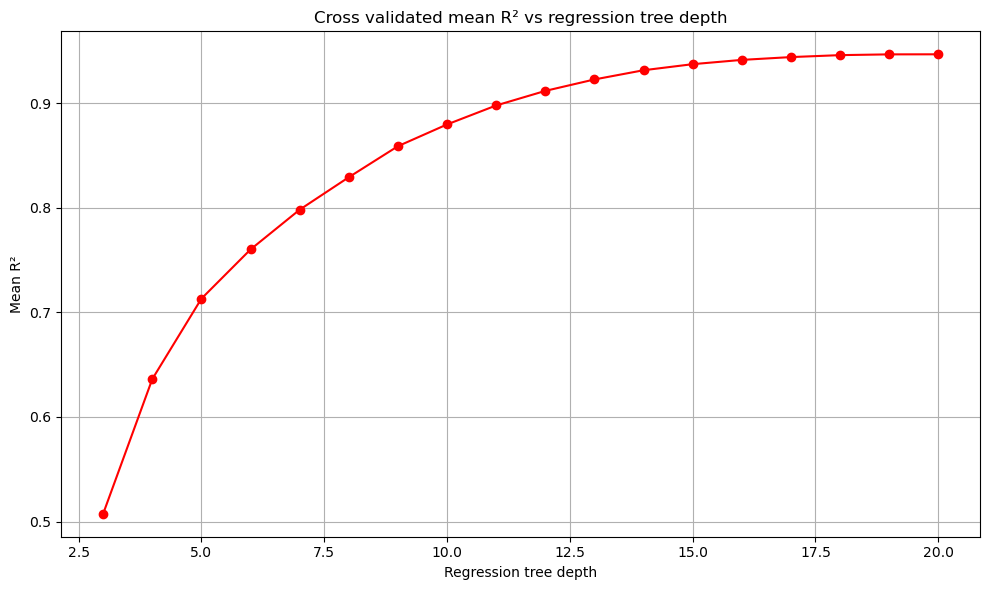

In [15]:
test_tree_depth(train_X, train_y)

We decided to choose a tree depth of 16 through 5-fold validation as not only does the mean R² values begin to plaeaeu, 
with R² values improvements becoming less than 0.4% beyond 16. Beyond this, a larger depth means a more complex model, and thus
the chance that the model might overfit to the training data increases even further.

In [4]:
y_pred_rt= test_rt(train_X, test_X, train_y, test_y)

Decision Tree accuracy for training set: 0.965199
Decision Tree accuracy for test set: 0.942986
Mean absolute error: ±$27874.19946572858


## Random Forest

In [5]:
y_pred_rf = test_rf(train_X, test_X, train_y, test_y)

Mean Squared Error: 794524989.139691
R^2 Score: 0.9714650756927724


# Model Comparison

In [7]:
feature_configs = [
    # Configuration 1: Baseline (No features)
    {
        'name': 'Baseline',
        'encoding_method': 'one_hot',
        'handle_outliers': False,
        'moving_window': False,
        'cyclic_month': False,
        'normal_year': False,
        'spatial_features': False
    },
    
    #Configuration 2: Spatial Features 
    {
        'name': 'Spatial Features',
        'encoding_method': 'one_hot',
        'handle_outliers': False,
        'moving_window': False,
        'cyclic_month': False,
        'normal_year': False,
        'spatial_features': ['MRT','CBD','MALL']
    },  
    # Configuration 3: Handle Outliers only
    {
        'name': 'Cap Outliers',
        'encoding_method': 'one_hot',
        'handle_outliers': True,
        'moving_window': False,
        'cyclic_month': False,
        'normal_year': False,
        'spatial_features': False
    },
    
    # Configuration 3: Cyclic Month only
    {
        'name': 'Cyclic Month',
        'encoding_method': 'one_hot',
        'handle_outliers': False,
        'moving_window': False,
        'cyclic_month': True,
        'normal_year': False,
        'spatial_features': False
    },
    
    # Configuration 4: Normalized Year only
    {
        'name': 'Normalized Year',
        'encoding_method': 'one_hot',
        'handle_outliers': False,
        'moving_window': False,
        'cyclic_month': False,
        'normal_year': True,
        'spatial_features': False
    },
    
    # Configuration 5: Moving Window only
    {
        'name': 'Moving Window',
        'encoding_method': 'one_hot',
        'handle_outliers': False,
        'moving_window': True,
        'cyclic_month': False,
        'normal_year': False,
        'spatial_features': False
    },
    
    # Configuration 8: Everything Enabled
    {
        'name': 'All Features',
        'encoding_method': 'one_hot',
        'handle_outliers': True,
        'moving_window': True,
        'cyclic_month': True,
        'normal_year': True,
        'spatial_features': ['CBD', 'MRT', 'MALL']
    }
]

In [8]:
print("Starting model comparison across different feature configurations...")
results = run_model_comparison(feature_configs)

Starting model comparison across different feature configurations...

Running with configuration: Baseline

Training KNN...
KNN - RMSE: 50010.47, MAE: 33627.01, R²: 0.9102

Training Linear...
Linear - RMSE: 76033.94, MAE: 60138.18, R²: 0.7924

Training Ridge...
Ridge - RMSE: 76033.96, MAE: 60138.00, R²: 0.7924

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 76035.81, MAE: 60138.94, R²: 0.7924

Training RandomForest...
RandomForest - RMSE: 34810.27, MAE: 23994.45, R²: 0.9565

Training RegressionTree...
RegressionTree - RMSE: 56272.69, MAE: 39513.31, R²: 0.8863

Running with configuration: Spatial Features

Training KNN...
KNN - RMSE: 44739.70, MAE: 30130.40, R²: 0.9281

Training Linear...
Linear - RMSE: 82078.12, MAE: 64409.97, R²: 0.7581

Training Ridge...
Ridge - RMSE: 82078.26, MAE: 64410.19, R²: 0.7581

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.513e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 82080.24, MAE: 64411.57, R²: 0.7580

Training RandomForest...
RandomForest - RMSE: 28004.96, MAE: 19290.16, R²: 0.9718

Training RegressionTree...
RegressionTree - RMSE: 38355.47, MAE: 26377.91, R²: 0.9472

Running with configuration: Cap Outliers

Training KNN...
KNN - RMSE: 50317.91, MAE: 33847.90, R²: 0.9091

Training Linear...
Linear - RMSE: 76496.95, MAE: 60439.30, R²: 0.7898

Training Ridge...
Ridge - RMSE: 76497.02, MAE: 60439.17, R²: 0.7898

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.989e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 76498.49, MAE: 60439.98, R²: 0.7898

Training RandomForest...
RandomForest - RMSE: 35134.72, MAE: 24152.71, R²: 0.9557

Training RegressionTree...
RegressionTree - RMSE: 56230.62, MAE: 39479.81, R²: 0.8864

Running with configuration: Cyclic Month

Training KNN...
KNN - RMSE: 44624.38, MAE: 30639.90, R²: 0.9285

Training Linear...
Linear - RMSE: 76055.49, MAE: 60147.71, R²: 0.7923

Training Ridge...
Ridge - RMSE: 76055.52, MAE: 60147.53, R²: 0.7923

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.201e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 76057.36, MAE: 60148.48, R²: 0.7922

Training RandomForest...
RandomForest - RMSE: 35010.06, MAE: 24168.58, R²: 0.9560

Training RegressionTree...
RegressionTree - RMSE: 56351.26, MAE: 39622.60, R²: 0.8860

Running with configuration: Normalized Year

Training KNN...
KNN - RMSE: 48754.33, MAE: 34190.72, R²: 0.9146

Training Linear...
Linear - RMSE: 76043.59, MAE: 60152.45, R²: 0.7923

Training Ridge...
Ridge - RMSE: 76033.96, MAE: 60137.99, R²: 0.7924

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 76035.81, MAE: 60138.92, R²: 0.7924

Training RandomForest...
RandomForest - RMSE: 34805.69, MAE: 23993.98, R²: 0.9565

Training RegressionTree...
RegressionTree - RMSE: 56274.34, MAE: 39514.29, R²: 0.8863

Running with configuration: Moving Window

Training KNN...
KNN - RMSE: 43808.11, MAE: 27701.82, R²: 0.9327

Training Linear...
Linear - RMSE: 47287.83, MAE: 31463.23, R²: 0.9215

Training Ridge...
Ridge - RMSE: 47287.75, MAE: 31460.62, R²: 0.9215

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+14, tolerance: 6.572e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 47531.98, MAE: 31602.19, R²: 0.9207

Training RandomForest...
RandomForest - RMSE: 40082.04, MAE: 23530.18, R²: 0.9436

Training RegressionTree...
RegressionTree - RMSE: 49689.46, MAE: 28545.87, R²: 0.9134

Running with configuration: All Features

Training KNN...
KNN - RMSE: 38303.49, MAE: 24235.64, R²: 0.9485

Training Linear...
Linear - RMSE: 47578.22, MAE: 31654.71, R²: 0.9206

Training Ridge...
Ridge - RMSE: 47578.52, MAE: 31652.11, R²: 0.9206

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.585e+14, tolerance: 6.572e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 47847.70, MAE: 31793.36, R²: 0.9197

Training RandomForest...
RandomForest - RMSE: 36928.28, MAE: 21676.02, R²: 0.9522

Training RegressionTree...
RegressionTree - RMSE: 48229.04, MAE: 27675.55, R²: 0.9184


In [ ]:
# Plot R² comparison
print("\nPlotting R² comparison...")
plot_model_comparison(results, metric='r2')

# Plot RMSE comparison
print("\nPlotting RMSE comparison...")
plot_model_comparison(results, metric='rmse')

# Plot MAE comparison
print("\nPlotting MAE comparison...")
plot_model_comparison(results, metric='mae')

# Summarize the best models
best_models = summarize_best_models(results)
print("\nBest Models by Configuration (sorted by R²):")
print(best_models)

# Find overall best configuration
best_config = best_models.iloc[0]
print(f"\nOverall best performance: {best_config['Configuration']} with {best_config['Best Model']}")
print(f"R²: {best_config['R²']:.4f}, RMSE: {best_config['RMSE']:.2f}, MAE: {best_config['MAE']:.2f}")

Starting model comparison across different feature configurations...

Running with configuration: Baseline

Training KNN...
KNN - RMSE: 50010.47, MAE: 33627.01, R²: 0.9102

Training Linear...
Linear - RMSE: 76033.94, MAE: 60138.18, R²: 0.7924

Training Ridge...
Ridge - RMSE: 76033.96, MAE: 60138.00, R²: 0.7924

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 76035.81, MAE: 60138.94, R²: 0.7924

Training RandomForest...
RandomForest - RMSE: 34810.27, MAE: 23994.45, R²: 0.9565

Training RegressionTree...
RegressionTree - RMSE: 56272.69, MAE: 39513.31, R²: 0.8863

Running with configuration: Spatial : Mall

Training KNN...
KNN - RMSE: 50482.03, MAE: 34033.67, R²: 0.9085

Training Linear...
Linear - RMSE: 87938.09, MAE: 68782.88, R²: 0.7223

Training Ridge...
Ridge - RMSE: 87938.15, MAE: 68783.08, R²: 0.7223

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.358e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 87938.72, MAE: 68783.68, R²: 0.7223

Training RandomForest...
RandomForest - RMSE: 28587.34, MAE: 19548.30, R²: 0.9706

Training RegressionTree...
RegressionTree - RMSE: 38619.24, MAE: 26543.55, R²: 0.9464

Running with configuration: Spatial : CBD

Training KNN...
KNN - RMSE: 49255.69, MAE: 33641.93, R²: 0.9129

Training Linear...
Linear - RMSE: 82110.87, MAE: 64462.91, R²: 0.7579

Training Ridge...
Ridge - RMSE: 82111.00, MAE: 64463.12, R²: 0.7579

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.519e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 82112.96, MAE: 64464.50, R²: 0.7578

Training RandomForest...
RandomForest - RMSE: 28502.13, MAE: 19589.42, R²: 0.9708

Training RegressionTree...
RegressionTree - RMSE: 38841.51, MAE: 26632.71, R²: 0.9458

Running with configuration: Spatial : MRT

Training KNN...
KNN - RMSE: 48910.70, MAE: 32928.40, R²: 0.9141

Training Linear...
Linear - RMSE: 87933.75, MAE: 68814.97, R²: 0.7223

Training Ridge...
Ridge - RMSE: 87933.79, MAE: 68815.14, R²: 0.7223

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.296e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 87934.21, MAE: 68815.65, R²: 0.7223

Training RandomForest...
RandomForest - RMSE: 28315.79, MAE: 19400.80, R²: 0.9712

Training RegressionTree...
RegressionTree - RMSE: 38491.31, MAE: 26564.41, R²: 0.9468

Running with configuration: Spatial : ALL

Training KNN...
KNN - RMSE: 44739.70, MAE: 30130.40, R²: 0.9281

Training Linear...
Linear - RMSE: 82078.12, MAE: 64409.97, R²: 0.7581

Training Ridge...
Ridge - RMSE: 82078.26, MAE: 64410.19, R²: 0.7581

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.513e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 82080.24, MAE: 64411.57, R²: 0.7580

Training RandomForest...
RandomForest - RMSE: 28004.96, MAE: 19290.16, R²: 0.9718

Training RegressionTree...
RegressionTree - RMSE: 38355.47, MAE: 26377.91, R²: 0.9472

Running with configuration: Outliers Only

Training KNN...
KNN - RMSE: 50317.91, MAE: 33847.90, R²: 0.9091

Training Linear...
Linear - RMSE: 76496.95, MAE: 60439.30, R²: 0.7898

Training Ridge...
Ridge - RMSE: 76497.02, MAE: 60439.17, R²: 0.7898

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.989e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 76498.49, MAE: 60439.98, R²: 0.7898

Training RandomForest...
RandomForest - RMSE: 35134.72, MAE: 24152.71, R²: 0.9557

Training RegressionTree...
RegressionTree - RMSE: 56230.62, MAE: 39479.81, R²: 0.8864

Running with configuration: Cyclic Month

Training KNN...
KNN - RMSE: 44624.38, MAE: 30639.90, R²: 0.9285

Training Linear...
Linear - RMSE: 76055.49, MAE: 60147.71, R²: 0.7923

Training Ridge...
Ridge - RMSE: 76055.52, MAE: 60147.53, R²: 0.7923

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.201e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 76057.36, MAE: 60148.48, R²: 0.7922

Training RandomForest...
RandomForest - RMSE: 35010.06, MAE: 24168.58, R²: 0.9560

Training RegressionTree...
RegressionTree - RMSE: 56351.26, MAE: 39622.60, R²: 0.8860

Running with configuration: Normalized Year

Training KNN...
KNN - RMSE: 48754.33, MAE: 34190.72, R²: 0.9146

Training Linear...
Linear - RMSE: 76043.59, MAE: 60152.45, R²: 0.7923

Training Ridge...
Ridge - RMSE: 76033.96, MAE: 60137.99, R²: 0.7924

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+14, tolerance: 6.611e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 76035.81, MAE: 60138.92, R²: 0.7924

Training RandomForest...
RandomForest - RMSE: 34805.69, MAE: 23993.98, R²: 0.9565

Training RegressionTree...
RegressionTree - RMSE: 56274.34, MAE: 39514.29, R²: 0.8863

Running with configuration: Moving Window

Training KNN...
KNN - RMSE: 43808.11, MAE: 27701.82, R²: 0.9327

Training Linear...
Linear - RMSE: 47287.83, MAE: 31463.23, R²: 0.9215

Training Ridge...
Ridge - RMSE: 47287.75, MAE: 31460.62, R²: 0.9215

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+14, tolerance: 6.572e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 47531.98, MAE: 31602.19, R²: 0.9207

Training RandomForest...
RandomForest - RMSE: 40082.04, MAE: 23530.18, R²: 0.9436

Training RegressionTree...
RegressionTree - RMSE: 49689.46, MAE: 28545.87, R²: 0.9134

Running with configuration: Target Encoding

Training KNN...
KNN - RMSE: 44608.54, MAE: 31218.52, R²: 0.9285

Training Linear...
Linear - RMSE: 96318.55, MAE: 74611.91, R²: 0.6668

Training Ridge...
Ridge - RMSE: 96318.55, MAE: 74611.89, R²: 0.6668

Training Lasso...
Lasso - RMSE: 96318.54, MAE: 74611.84, R²: 0.6668

Training RandomForest...
RandomForest - RMSE: 35749.99, MAE: 24482.26, R²: 0.9541

Training RegressionTree...
RegressionTree - RMSE: 47736.47, MAE: 31851.57, R²: 0.9182

Running with configuration: Temporal Features

Training KNN...
KNN - RMSE: 41530.77, MAE: 26085.08, R²: 0.9395

Training Linear...
Linear - RMSE: 47292.54, MAE: 31463.99, R²: 0.9215

Training Ridge...
Ridge - RMSE: 47288.88, MAE: 31461.77, R²: 0.9215

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+14, tolerance: 6.572e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 47533.04, MAE: 31602.93, R²: 0.9207

Training RandomForest...
RandomForest - RMSE: 40103.45, MAE: 23549.26, R²: 0.9436

Training RegressionTree...
RegressionTree - RMSE: 49711.08, MAE: 28561.80, R²: 0.9133

Running with configuration: All Features

Training KNN...
KNN - RMSE: 38303.49, MAE: 24235.64, R²: 0.9485

Training Linear...
Linear - RMSE: 47578.22, MAE: 31654.71, R²: 0.9206

Training Ridge...
Ridge - RMSE: 47578.52, MAE: 31652.11, R²: 0.9206

Training Lasso...


c:\Users\tvage\.conda\envs\ee2211\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.585e+14, tolerance: 6.572e+11
  model = cd_fast.enet_coordinate_descent(


Lasso - RMSE: 47847.70, MAE: 31793.36, R²: 0.9197

Training RandomForest...
RandomForest - RMSE: 36928.28, MAE: 21676.02, R²: 0.9522

Training RegressionTree...
RegressionTree - RMSE: 48229.04, MAE: 27675.55, R²: 0.9184

Plotting R² comparison...


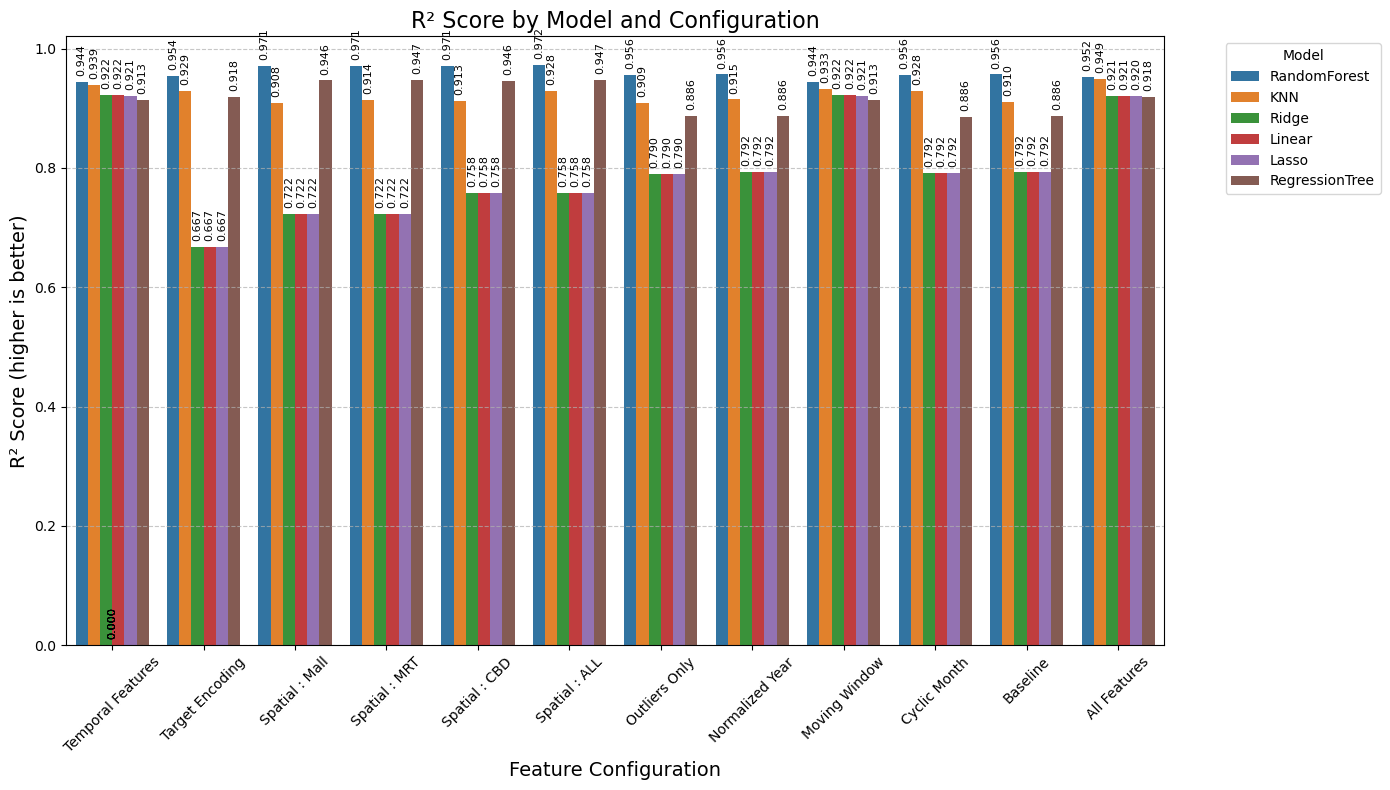


Plotting RMSE comparison...


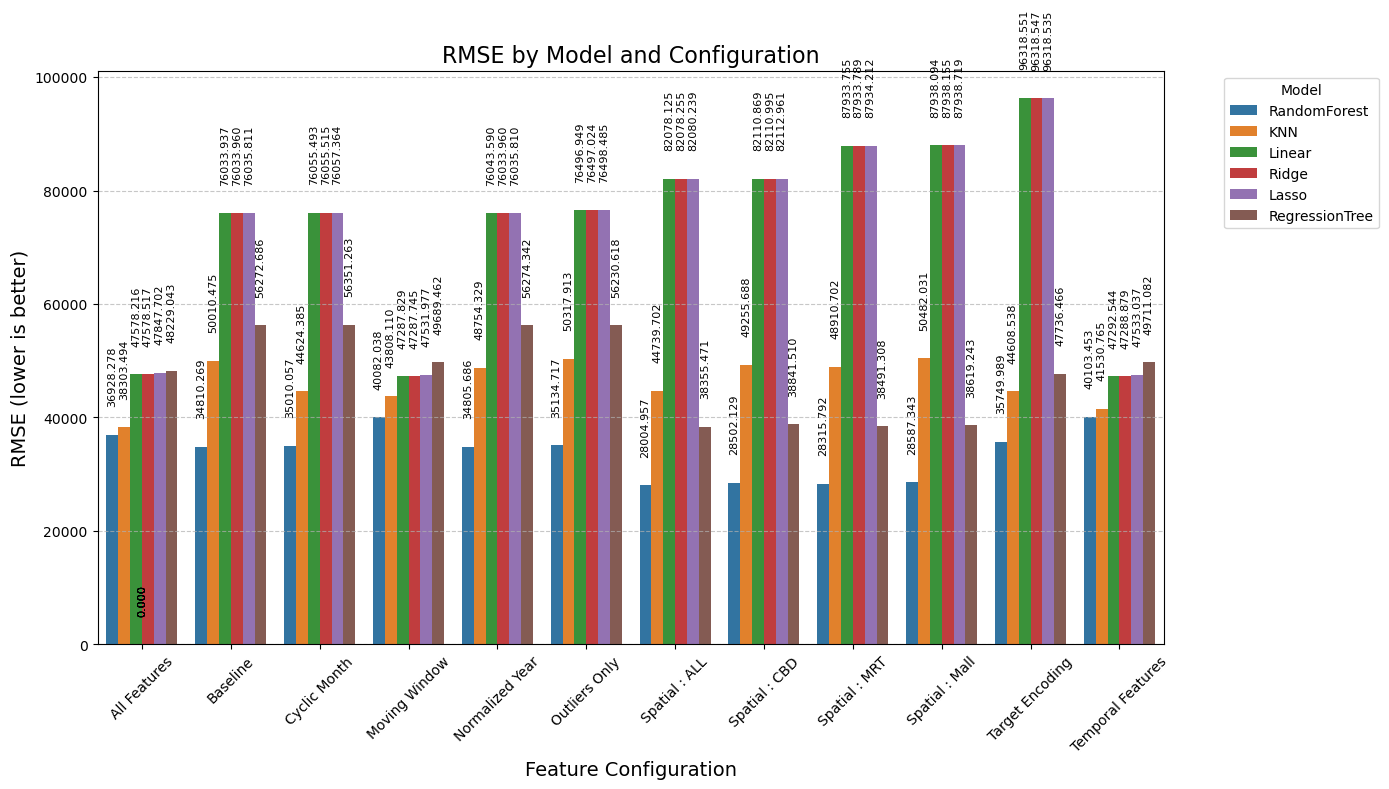


Plotting MAE comparison...


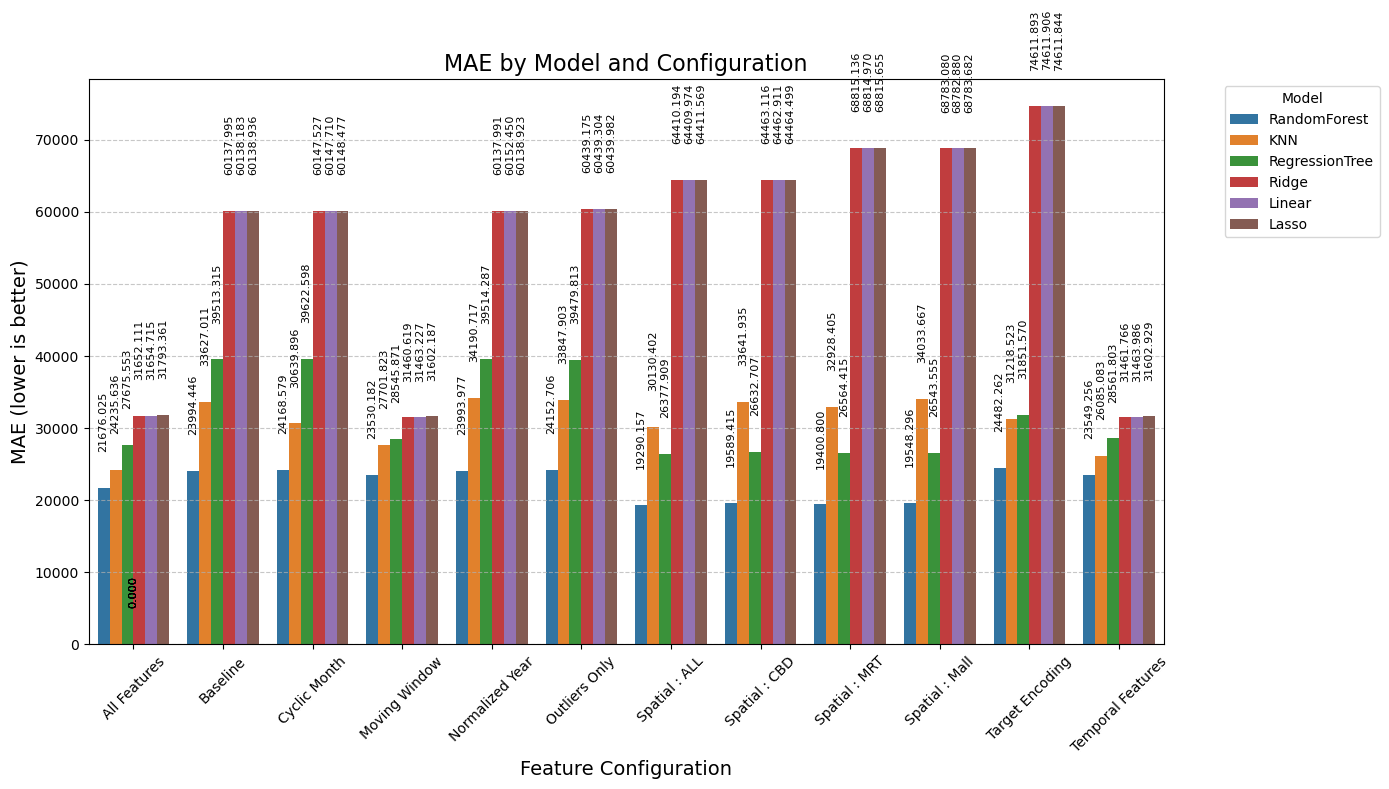


Best Models by Configuration (sorted by R²):
        Configuration    Best Model        R²          RMSE           MAE
4       Spatial : ALL  RandomForest  0.971833  28004.957157  19290.156609
3       Spatial : MRT  RandomForest  0.971204  28315.792200  19400.800431
2       Spatial : CBD  RandomForest  0.970824  28502.129098  19589.415107
1      Spatial : Mall  RandomForest  0.970649  28587.343222  19548.295567
7     Normalized Year  RandomForest  0.956492  34805.685868  23993.976631
0            Baseline  RandomForest  0.956480  34810.268705  23994.446457
6        Cyclic Month  RandomForest  0.955980  35010.056794  24168.579342
5       Outliers Only  RandomForest  0.955665  35134.717189  24152.705835
9     Target Encoding  RandomForest  0.954099  35749.988999  24482.261738
11       All Features  RandomForest  0.952151  36928.278279  21676.024994
8       Moving Window  RandomForest  0.943630  40082.037614  23530.181689
10  Temporal Features  RandomForest  0.943569  40103.452697  23549

In [ ]:

# Run the model comparison
print("Starting model comparison across different feature configurations...")
results = run_model_comparison(feature_configs)

# Plot R² comparison
print("\nPlotting R² comparison...")
plot_model_comparison(results, metric='r2')

# Plot RMSE comparison
print("\nPlotting RMSE comparison...")
plot_model_comparison(results, metric='rmse')

# Plot MAE comparison
print("\nPlotting MAE comparison...")
plot_model_comparison(results, metric='mae')

# Summarize the best models
best_models = summarize_best_models(results)
print("\nBest Models by Configuration (sorted by R²):")
print(best_models)

# Find overall best configuration
best_config = best_models.iloc[0]
print(f"\nOverall best performance: {best_config['Configuration']} with {best_config['Best Model']}")
print(f"R²: {best_config['R²']:.4f}, RMSE: {best_config['RMSE']:.2f}, MAE: {best_config['MAE']:.2f}")